In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
file_path = 'DataScientist.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

df.head()


,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [13]:
# Create a new DataFrame with 'id' and 'job description'
job_description_df = df[['Job Description']].reset_index().rename(columns={'index': 'id'})

# Display the new DataFrame
job_description_df.head()

,id,Job Description
0,0,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ..."
1,1,"At Noom, we use scientifically proven methods ..."
2,2,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...
3,3,Sapphire Digital seeks a dynamic and driven mi...
4,4,"Director, Data Science - (200537)\nDescription..."


# Exploratory Data Analaysis (EDA)

Exploratory Data Analysis (EDA) is a crucial phase in the data analysis process, serving as an initial and fundamental exploration of a dataset's characteristics. During EDA, data analysts or scientists employ various statistical and visualization techniques to gain insights into the structure, patterns, and potential anomalies within the data. This process involves summarizing key statistical measures, visualizing distributions, identifying trends, and examining relationships between variables.

In [14]:
# Display basic information about the DataFrame
job_description_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               3909 non-null   int64 
 1   Job Description  3909 non-null   object
dtypes: int64(1), object(1)
memory usage: 61.2+ KB


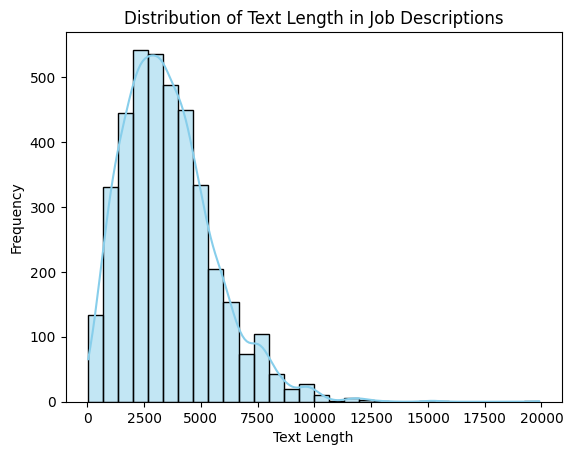

In [16]:
# Calculate text length for each job description
job_description_df['Text Length'] = job_description_df['Job Description'].apply(len)

# Plot the distribution of text length
sns.histplot(job_description_df['Text Length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Text Length in Job Descriptions')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


<ipython-input-18-869eaebc6d70>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_words, palette='viridis')


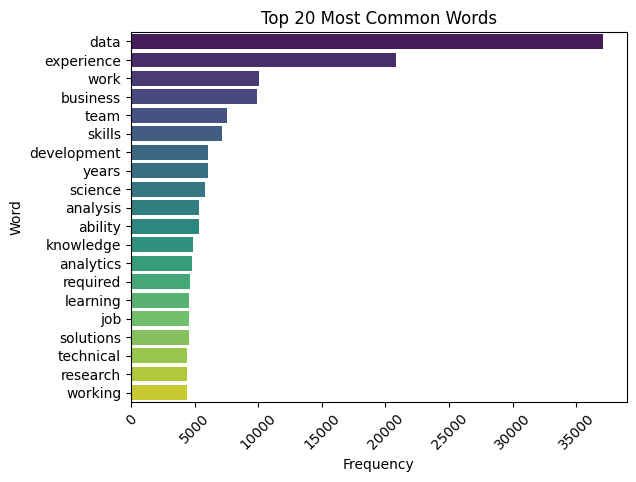

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

# Tokenize and count the most common words
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(job_description_df['Job Description'])
word_freq = pd.DataFrame(list(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])), columns=['Word', 'Frequency'])

# Display the top 20 most common words
top_words = word_freq.sort_values(by='Frequency', ascending=False).head(20)
sns.barplot(x='Frequency', y='Word', data=top_words, palette='viridis')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.show()



# PreProcessing The Data
1. Lowercasing the text.

2. Removing non-alphabetic characters.

3. Tokenizing the text using NLTK.

4. Lemmatizing using NLTK's WordNetLemmatizer.

5. Removing stop words

In [39]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [20]:
# Function for preprocessing
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize the text using NLTK
    tokens = word_tokenize(text)

    # Lemmatization using NLTK's WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    return ' '.join(tokens)

In [21]:
# Apply preprocessing to the 'Job Description' column
job_description_df['Preprocessed_Description'] = job_description_df['Job Description'].apply(preprocess_text)

In [22]:
job_description_df['Preprocessed_Description'].head()

0    hopper hopper mission make booking travel fast...
1    noom use scientifically proven method help use...
2    decodem httpswwwdecodemcom data science manage...
3    sapphire digital seek dynamic driven midlevel ...
4    director data science description edelman inte...
Name: Preprocessed_Description, dtype: object

# Part Of Speech (POS) Tagging
Part-of-Speech (POS) tagging is indispensable for keyword extraction due to its pivotal role in deciphering the syntactic structure and semantic nuances of text. By categorizing each word in a document into its grammatical type, POS tagging enables the identification of key elements such as nouns, verbs, and adjectives. This information is crucial for discerning the context and relationships between words, facilitating the extraction of meaningful keywords.

In [28]:
# Part-of-Speech Tagging (POS)
def pos_tagging(text):
    pos_tags = nltk.pos_tag(word_tokenize(text))
    return pos_tags

In [29]:
# Apply POS tagging to the preprocessed text
job_description_df['pos_tags'] = job_description_df['Preprocessed_Description'].apply(pos_tagging)

In [30]:
job_description_df = job_description_df.rename(columns={'pos_tags': 'POS_Tags'})

In [31]:
job_description_df['POS_Tags'].head()

0    [(hopper, JJ), (hopper, NN), (mission, NN), (m...
1    [(noom, NN), (use, NN), (scientifically, RB), ...
2    [(decodem, NN), (httpswwwdecodemcom, NN), (dat...
3    [(sapphire, NN), (digital, JJ), (seek, JJ), (d...
4    [(director, NN), (data, NNS), (science, NN), (...
Name: POS_Tags, dtype: object

# Named Entity Recognition (NER)
 NER plays a pivotal role in keyword extraction by identifying and categorizing entities within a given text. In the context of keyword extraction, entities often represent key terms, such as company names, locations, or specific products, that are instrumental for understanding the central themes and context of a document. NER helps distinguish between general words and proper nouns, ensuring that relevant and specific terms are prioritized during keyword extraction. By recognizing entities, NER contributes to the precision and relevance of the extracted keywords, as it aids in capturing domain-specific terminology and discerning the essential elements within a text

In [59]:
import spacy

# Load SpaCy's English NER model
nlp = spacy.load("en_core_web_sm")

# Named Entity Recognition (NER) using SpaCy
def ner_tagging_spacy(text):
    doc = nlp(text)
    return [(ent.label_, ent.text) for ent in doc.ents]

In [60]:
# Apply NER tagging to the preprocessed text using SpaCy
job_description_df['NER_Tags'] = job_description_df['Preprocessed_Description'].apply(ner_tagging_spacy)

In [61]:
job_description_df['NER_Tags'].head()

0    [(CARDINAL, one), (CARDINAL, one), (DATE, two year), (CARDINAL, million), (CARDINAL, million), (PERSON, webby), (DATE, every day), (CARDINAL, billion), (GPE, sa)]
1                                                                                                                               [(DATE, three week), (DATE, like year)]
2                                                                                                   [(GPE, new york), (GPE, new york city), (DATE, year), (DATE, year)]
3                                                                           [(ORG, analystqa join), (ORG, new jersey), (DATE, year), (ORG, healthcare), (ORG, powerbi)]
4                         [(DATE, day day), (NORP, kera), (CARDINAL, one), (DATE, year five), (ORG, united entertainment group), (ORG, united statesnew york job type)]
Name: NER_Tags, dtype: object

# TF-IDF

TF-IDF, which stands for Term Frequency-Inverse Document Frequency, is a numerical statistic widely used in natural language processing and information retrieval to evaluate the importance of words within a document relative to a larger collection of documents, known as a corpus. The process begins with the calculation of term frequency (TF), representing how often a specific word appears in a given document. However, to avoid giving too much weight to commonly occurring words, the inverse document frequency (IDF) is then computed. IDF measures the rarity of a word across the entire corpus, emphasizing terms that are unique or distinctive to a particular document.

The TF-IDF score is obtained by multiplying the term frequency by the inverse document frequency. A high TF-IDF score indicates that a word is both frequent within a document and rare in the corpus, suggesting its significance in characterizing the content of that document.

In the context of extracting top keywords per description, TF-IDF serves as a valuable tool. By applying TF-IDF to preprocessed text data, we can generate a matrix where each row corresponds to a document (in this case, a job description) and each column represents a unique term in the entire corpus. The TF-IDF values in this matrix quantify the importance of each term within each document. To identify the top keywords, we sort these values for each document and select the terms with the highest TF-IDF scores. This process allows us to pinpoint the words that contribute the most to the uniqueness and significance of each job description, facilitating the extraction of key information such as job titles, company names, and other relevant details.

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed text
tfidf_matrix = tfidf_vectorizer.fit_transform(job_description_df['Preprocessed_Description'])

# Get feature names (words) from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Extract top TF-IDF keywords for each document
top_keywords_per_document = {}
# Iterate over each row (document) in the TF-IDF matrix
for i, row in enumerate(tfidf_matrix):
   # Find the indices of non-zero elements in the current row
    feature_index = row.nonzero()[1]

     # Create a list of tuples containing the feature index and its corresponding TF-IDF score
    tfidf_scores = zip(feature_index, [row[0, x] for x in feature_index])

    # Sort the feature indices based on their TF-IDF scores in descending order
    top_keywords = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:20]  # Adjust the number of top keywords as needed

    # Map the feature indices to their corresponding words and store in the dictionary
    top_keywords_per_document[i] = [(feature_names[index], score) for (index, score) in top_keywords]

# Add the top keywords to  DataFrame
job_description_df['Top_Keywords'] = job_description_df.index.map(top_keywords_per_document)


In [63]:
pd.set_option('display.max_colwidth', None)
print(job_description_df['Top_Keywords'].head())

0                                                     [(hopper, 0.5792959548117376), (travel, 0.24826658337255514), (app, 0.23050795920541203), (amplitude, 0.13920004980565714), (fastestgrowing, 0.11821711509131942), (nontechnical, 0.10961391952037897), (canada, 0.10735587165028251), (data, 0.10522113544688967), (extremely, 0.09731865182742161), (award, 0.09238481719456591), (large, 0.08841553229534985), (business, 0.08809927623462668), (ha, 0.08801183458375557), (webby, 0.08686230483661565), (praise, 0.08686230483661565), (tool, 0.08369349757974354), (tremendously, 0.07984349618059307), (traveler, 0.07984349618059307), (primed, 0.07984349618059307), (booking, 0.07984349618059307)]
1                  [(lifestyle, 0.1981436265175672), (like, 0.17229364786147056), (affect, 0.17105688686823625), (youll, 0.14469944481169325), (transcend, 0.1439452716235376), (similarlysized, 0.1439452716235376), (scientificallyproven, 0.1439452716235376), (hypertension, 0.1439452716235376), (obesity, 0.143

In [64]:
# Rename 'Text Length' to 'Original_Text_Length'
job_description_df = job_description_df.rename(columns={'Text Length': 'Original_Text_Length'})

# Add a new column 'Cleaned_Text_Length' for the length of preprocessed description
job_description_df['Cleaned_Text_Length'] = job_description_df['Preprocessed_Description'].apply(len)

In [68]:
# Reorder columns
column_order = ['id', 'Job Description', 'Original_Text_Length', 'Preprocessed_Description',
                'Cleaned_Text_Length', 'POS_Tags', 'NER_Tags', 'Top_Keywords']

# Reassign DataFrame with the new column order
job_description_df = job_description_df[column_order]

In [69]:
job_description_df.head()

,id,Job Description,Original_Text_Length,Preprocessed_Description,Cleaned_Text_Length,POS_Tags,NER_Tags,Top_Keywords
0,0,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission to make booking travel faster, easier, and more transparent. We are leveraging the power that comes from combining massive amounts of data and machine learning to build the world’s fastest-growing travel app -- one that enables our customers to save money and travel more. With over $235M CAD in funding from leading investors in both Canada and the US, Hopper is primed to continue its path toward becoming the go-to way to book travel as the world continues its shift to mobile.\n\nRecognized as the fastest-growing travel app by Forbes and one of the world’s most innovative companies by Fast Company two years in a row, Hopper has been downloaded over 40 million times and has helped travelers plan over 100 million trips and counting. The app has received high praise in the form of mobile accolades such as the Webby Award for Best Travel App of 2019, the Google Play Award for Standout Startup of 2016 and Apple’s App Store Best of 2015.\n\nTake off with us!\n\nTHE ROLE\n\nHopper is looking for a data-savvy individual to join our team as a Data Scientist and lead data-centric product development and complex business intelligence projects within our core air travel business unit. Every day you would draw powerful insights from our real-time feed of billions of flight search results and archives of several trillion data points. To succeed at Hopper you need the talent, passion, and experience to thrive in a highly performing company.\nIN THIS ROLE YOU WILL:\nFrame and conduct complex exploratory analyses needed to deepen our understanding of Hopper users.\nPartner with product, business and strategy teams to leverage this user understanding for product improvements and other initiatives\nUse machine learning and big data tools on tremendously large and complex data sets to enhance our data-driven, personalized travel advice\nConduct research into various aspects of our business and employ statistical and modeling techniques when appropriate to make recommendations to non-technical stakeholders\nCreate advanced dashboards for product experiment tracking and business unit performance analysis using Amplitude and Tableau\nFind effective ways to simplify and communicate analyses to a non-technical audience.\nA PERFECT CANDIDATE HAS:\nA degree in Math, Statistics, Computer Science, Engineering or other quantitative disciplines\nExtremely strong analytical and problem-solving skills\nProven ability to communicate complex technical work to a non-technical audience\nA strong passion for and extensive experience in conducting empirical research and answering hard questions with data\nExperience with a data visualization tool (Tableau preferred) and project analysis tool such as Amplitude\nExperience with relational databases and SQL, especially Hive\nExperience working with extremely large data sets\nExperience in Pandas, R, SAS or other tools appropriate for large scale data preparation and analysis\nExperience with data mining, machine learning, statistical modeling tools and underlying algorithms\nProficiency with Unix/Linux environments\nBENEFITS\n\n• Well-funded and proven startup with large ambitions, competitive salary and stock options\n• Dynamic and entrepreneurial team where pushing limits is everyday business\n• 100% employer paid medical, dental, vision, disability and life insurance plans\n• Access to a 401k (US) or Retirement Savings Plan (Canada)",3417,hopper hopper mission make booking travel faster easier transparent leveraging power come combining massive amount data machine learning build world fastestgrowing travel app one enables customer save money travel cad funding leading investor canada u hopper primed continue path toward becoming goto way book travel world continues shift mobile recognized fastestgrowing travel app forbes one world innovative company f

In [70]:
# Assuming job_description_df is your DataFrame
job_description_df.to_csv('cleaned_job_description.csv', index=False)